we are building a Decision Tree  Classifier model. our objective is to predict the Quailty of the wine. 

In [4]:
#Importing Libraries for Exploratory Data Analysis
import numpy as np
import pandas as pd

#Importing Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [5]:
#Importing dataset from a URL.

url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url,sep = ';')

# Exploratory Data Analysis

In [6]:
data.shape

(1599, 12)

In [7]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Data Preprocessing

In [10]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [11]:
data.loc[(data.quality<=5),'taste'] = 'Bad'
data.loc[(data.quality>=6),'taste'] = 'Good'
#data.loc[(data.quality>=5) & (data.quality >=7),'taste'] = 'Normal'

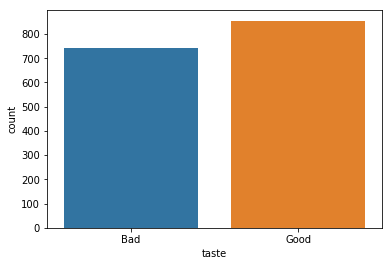

In [12]:
sb.countplot(x= 'taste', data=data)

In [13]:
data.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,taste
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Bad
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,Bad
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,Bad
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,Good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,Good
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,Bad


In [14]:
# Taking X and Y variables for prediction.
X = data.iloc[:,:10]
y = data.quality

In [15]:
# data scaling
from sklearn.preprocessing import scale
X = scale(X)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20,random_state = 30)

In [18]:
# Machine Learning Model

from sklearn.tree import DecisionTreeClassifier

In [72]:
model = DecisionTreeClassifier(criterion='gini',  max_depth=17)

In [73]:
X_train

array([[-1.79232659, -0.21128341, -0.05636026, ..., -0.76675977,
         2.58449854, -0.22512806],
       [-0.18364134,  1.57638909, -0.10771073, ..., -0.03534088,
        -0.78472608, -1.4053896 ],
       [-1.1603431 ,  2.74954917, -1.39147228, ..., -1.25967251,
         1.80698517, -0.6382196 ],
       ...,
       [-0.29854743, -0.04368911, -0.10771073, ...,  0.87628268,
         0.77030067, -0.04808883],
       [ 0.9079665 , -1.44030825,  1.12470036, ..., -1.01056607,
        -0.78472608, -0.81525883],
       [-0.98798397,  1.74398339, -1.23742089, ..., -0.81976114,
         1.3534357 , -0.57920652]])

y_train

In [74]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=17,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [75]:
predict = model.predict(X_test)

# Model Evaluation

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [77]:
 accuracy_score(y_test,predict)

0.596875

In [53]:
confusion_matrix(y_test,predict)

array([[ 0,  0,  1,  1,  0,  0],
       [ 0,  2,  6,  6,  0,  0],
       [ 0,  3, 91, 31,  7,  2],
       [ 0,  1, 33, 81, 11,  2],
       [ 0,  1,  2, 12, 19,  5],
       [ 0,  0,  1,  0,  2,  0]])

In [ ]:
# Try to improve the accuracy score. ( closer to 1.0)